In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Untuk Google Colab :
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file = '/content/drive/MyDrive/GoogleColab/diabetes.csv'
df = pd.read_csv(file)

Mounted at /content/drive


#Data Gathering & Data Preprocessing

In [ ]:
df = pd.read_csv(file)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T
#T = transpose

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df_remove_zero = df.copy(deep=True)
df_remove_zero[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_remove_zero[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [ ]:
df_remove_zero.isna().sum()
#isna untuk cek mana yang kosong untuk setiap kolomnya

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
total = df_remove_zero.isnull().sum().sort_values(ascending=False)
percent = (df_remove_zero.isnull().sum()/df_remove_zero.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data.head(20)

,Total,Missing Percent
Insulin,374,0.486979
SkinThickness,227,0.295573
BloodPressure,35,0.045573
BMI,11,0.014323
Glucose,5,0.006510
Pregnancies,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


In [ ]:
df_remove_zero[df_remove_zero.duplicated()]
#duplicated untuk cek apakah ada angka yang sama

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

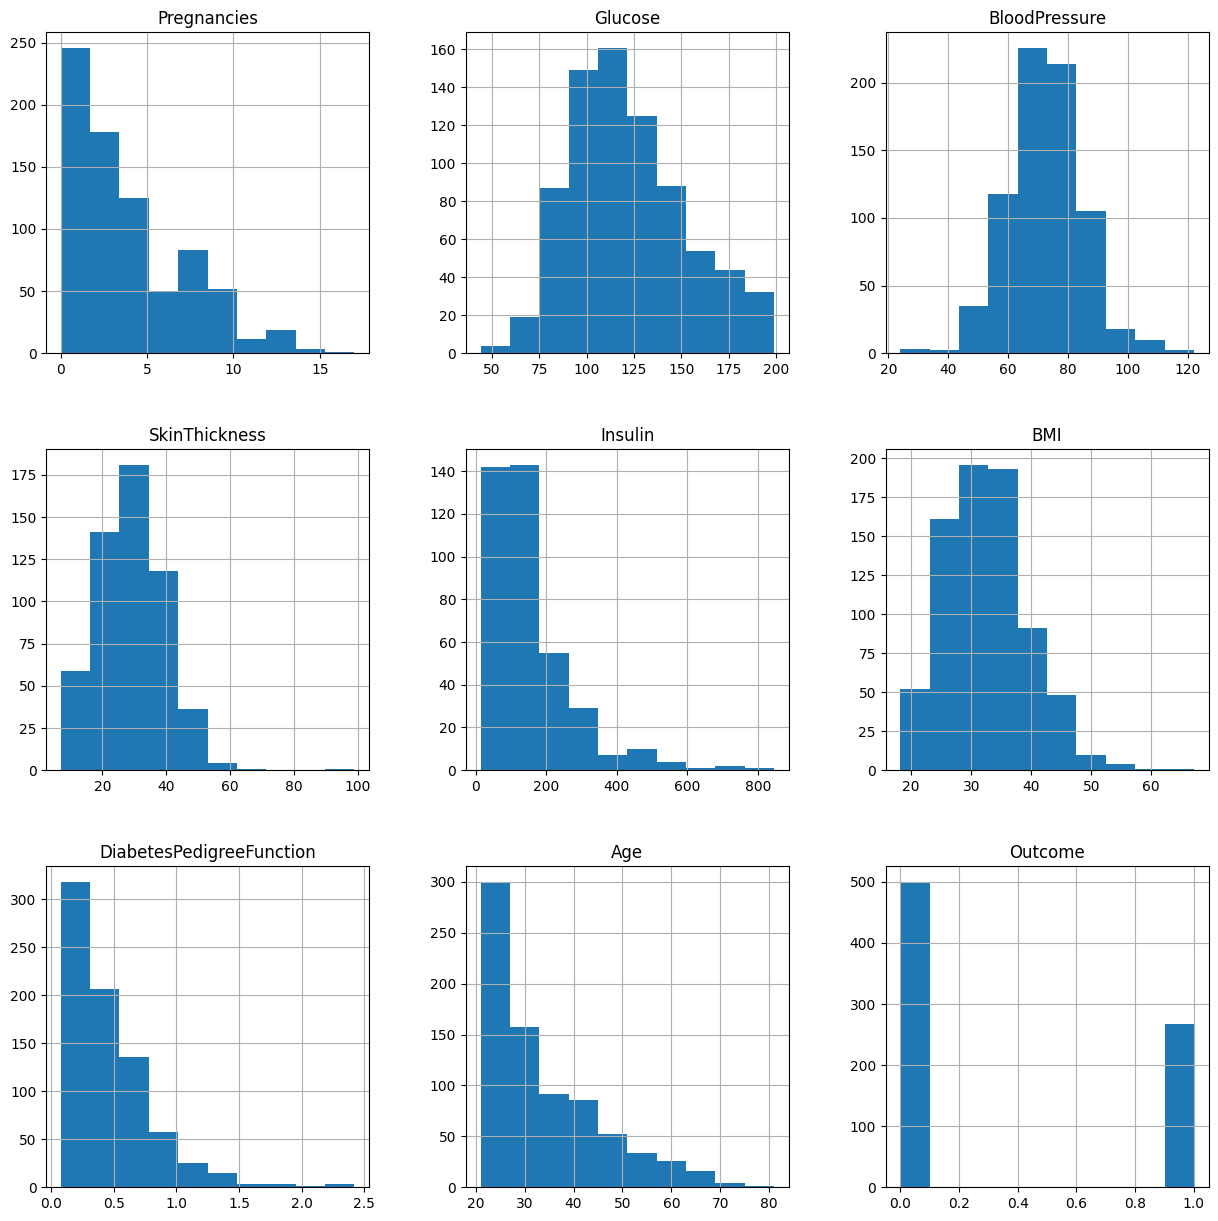

In [ ]:
df_remove_zero.hist(figsize=(15,15))

In [ ]:
df_remove_zero['Glucose'] = df_remove_zero['Glucose'].fillna(df_remove_zero['Glucose'].median())
df_remove_zero['BloodPressure'] = df_remove_zero['BloodPressure'].fillna(df_remove_zero['BloodPressure'].median())
df_remove_zero['SkinThickness'] = df_remove_zero['SkinThickness'].fillna(df_remove_zero['SkinThickness'].median())
df_remove_zero['Insulin'] = df_remove_zero['Insulin'].fillna(df_remove_zero['Insulin'].median())
df_remove_zero['BMI'] = df_remove_zero['BMI'].fillna(df_remove_zero['BMI'].median())
#fillna berfungsi untuk mengisi bagian2 yang kosong
#inplace berfungsi untuk langsung di replace dari kolom2 yang diubah

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

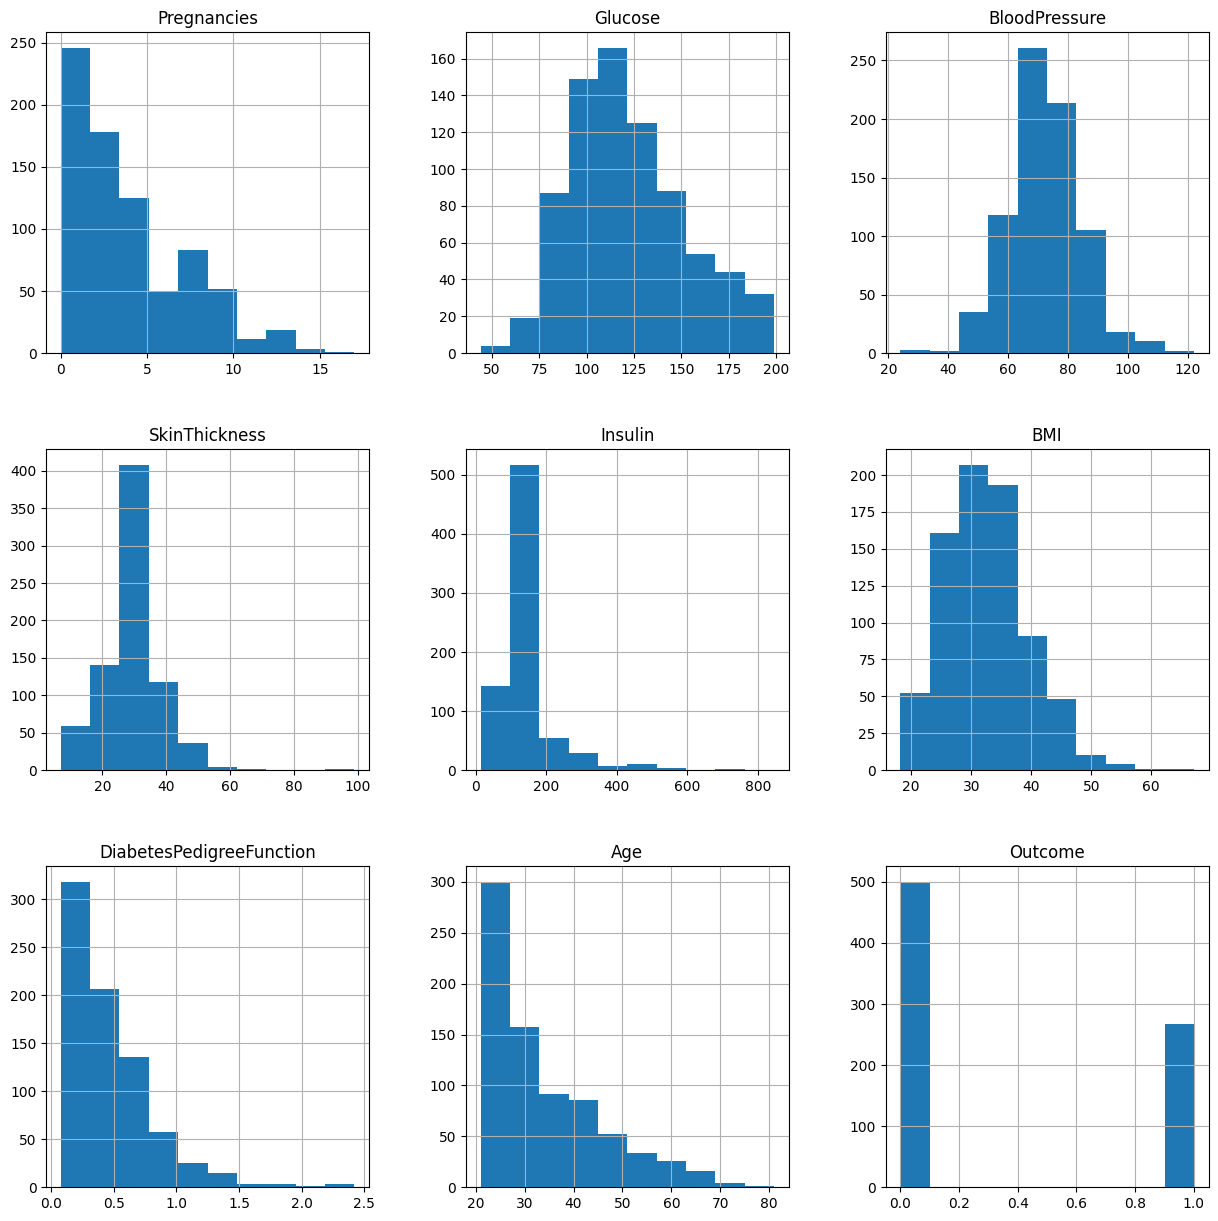

In [ ]:
df_remove_zero.hist(figsize=(15,15))

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
#iloc berfungsi untuk memfilter dari indeks
# arti :,:-1 data yang diambil sisan terakhir yang tidak diambil sbg x
#arti :,-1 data yang diambil bagian kolom yang terakhir aja

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
#maksud dari random_state yaitu setiap pengacakan yang ada selalu stabil atau sama

In [ ]:
X_test

array([[  6.   ,  98.   ,  58.   , ...,  34.   ,   0.43 ,  43.   ],
       [  2.   , 112.   ,  75.   , ...,  35.7  ,   0.148,  21.   ],
       [  2.   , 108.   ,  64.   , ...,  30.8  ,   0.158,  21.   ],
       ...,
       [  6.   , 123.   ,  72.   , ...,  33.6  ,   0.733,  34.   ],
       [  3.   ,  78.   ,  50.   , ...,  31.   ,   0.248,  26.   ],
       [  3.   , 106.   ,  72.   , ...,  25.8  ,   0.207,  27.   ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 13.   , 129.   ,   0.   , ...,  39.9  ,   0.569,  44.   ],
       [  4.   , 129.   ,  86.   , ...,  35.1  ,   0.231,  23.   ],
       [  3.   ,  61.   ,  82.   , ...,  34.4  ,   0.243,  46.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled
#scaled berfusngi untuk menyamakan pada saat pemodelan sehingga memudahkan, apabila dibalikan ke asli tidak sesuai hanya untuk pemodelan saja. misal awalnya X_train =13 kali hamil, setelah scaled menjadi 2,8

array([[ 2.80346794,  0.25977903, -3.78077929, ...,  1.03974028,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.25977903,  0.89724451, ...,  0.40945373,
        -0.70087555, -0.86295593],
       [-0.22446668, -1.85825286,  0.67966201, ...,  0.31753694,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.61235174,  0.89724451, ...,  1.78820556,
         1.96850229,  0.44167036],
       [-1.13284707,  0.63354937, -3.78077929, ...,  1.36801453,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.13518892,  1.44120077, ..., -1.24504846,
        -0.6094383 , -1.03690611]])

#Training Model & Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
#support artinya jumlah datanya

[[95 28]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[86 37]
 [23 46]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       123
           1       0.55      0.67      0.61        69

    accuracy                           0.69       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.70      0.69      0.69       192



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[97 26]
 [25 44]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       123
           1       0.63      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.73      0.73       192



#Model Optimization

In [ ]:
#Define the models and their respective hyperparameter grids
model = [
    {
        'name': 'Logistic Regression',
        'classifier': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10]
    }
},
{
    'name': 'Decision Tree',
    'classifier': DecisionTreeClassifier(),
    'params': {
        'max_depth': [3, 5, 7],
    }
},
{
      'name': 'Random Forest',
      'classifier': RandomForestClassifier(),
      'params': {
          'n_estimators': [100, 200, 300],
          'max_depth': [3, 5, 7],
      }
    }
]

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

#Perform cross-validation and hyperparameter tuning for each model
for model in models:
  print(f"Model: {model['name']}")

  #Create the classifier with default hyperparameters
  classifier = model['classifier']

  #perform hyperparameter tuning using GridSearchCV
  grid_search = GridSearchCV(classifier, param_grid=model['param_grid'], cv=5, scoring ='accuracy')
  grid_search.fit(X_train_scaled, y_train)

  #Set the best parameters to the classifier
  Best_params = grid_search.best_params_
  print(f"Best Hyperparameters: {grid_search.best_params_}")
  classifier.set_params(**Best_params)

  #Perform cross-validation after hyperparameter tuning
  scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
  print(f"Accuracy after hyperparameter tuning: {np.mean(scores)}")
  print('-' * 50)

NameError: name 'models' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Perform cross-validation and hyperparameter tuning for each model
for model in models:
    print(f"Model: {model['name']}")

    # Create the classifier with default hyperparameters
    classifier = model['classifier']

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid=model['param_grid'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Set the best parameters to the classifier
    Best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {Best_params}")
    classifier.set_params(**Best_params)

    # Perform cross-validation after hyperparameter tuning
    scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Accuracy after hyperparameter tuning: {np.mean(scores)}")
    print('-' * 50)

Model: Random Forest


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np  # Ensure numpy is imported for mean calculation

# Define the models and their respective hyperparameter grids
models = [  # Changed from model to models
    {
        'name': 'Logistic Regression',
        'classifier': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10]
        }
    },
    {
        'name': 'Decision Tree',
        'classifier': DecisionTreeClassifier(),
        'param_grid': {  # Changed from params to param_grid for consistency
            'max_depth': [3, 5, 7],
        }
    },
    {
        'name': 'Random Forest',
        'classifier': RandomForestClassifier(),
        'param_grid': {  # Changed from params to param_grid for consistency
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
        }
    }
]

# Perform cross-validation and hyperparameter tuning for each model
for model in models:
    print(f"Model: {model['name']}")

    # Create the classifier with default hyperparameters
    classifier = model['classifier']

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid=model['param_grid'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Set the best parameters to the classifier
    Best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {Best_params}")
    classifier.set_params(**Best_params)

    # Perform cross-validation after hyperparameter tuning
    scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Accuracy after hyperparameter tuning: {np.mean(scores)}")
    print('-' * 50)

Model: Logistic Regression
Best Hyperparameters: {'C': 1}
Accuracy after hyperparameter tuning: 0.7759820089955023
--------------------------------------------------
Model: Decision Tree
Best Hyperparameters: {'max_depth': 3}
Accuracy after hyperparameter tuning: 0.7413043478260869
--------------------------------------------------
Model: Random Forest
Best Hyperparameters: {'max_depth': 7, 'n_estimators': 100}
Accuracy after hyperparameter tuning: 0.7812293853073463
--------------------------------------------------
